# Introduction
Introduce the problem you are trying to solve, questions you are trying to answer, and/or overall goal of the project.   
https://www.kaggle.com/datasets/datasnaek/chess

# About the Data
Describe where you got your data. This could include obtaining the data through Kaggle or other resources, or scraping the data yourself somehow.   
   
Also provide information about the dataset itself (what features, the size of the dataset, and any additional statistics or visualizations you create to better understand the data).

# Methods
This should include descriptions of any pre-processing steps and the modeling. If you experiment by trying things out in different iterations, it is encouraged to also talk about all of that! What worked or what didn’t? Were you able to improve upon the model(s) or gain new insights through different iterations?

# Evaluation
Based on your goal/model — how do you evaluate performance? What are the results?

For example, if you are running classification models, what are the accuracies, f1 scores, etc.? If you had questions in the introduction, were you able to answer them (discuss that)? etc.

Think about the best way to evaluate based on what you are trying to accomplish.

# Storytelling and Conclusion
What insights did you gain through your project? Were you able to answer your initial problems? Obtain your initial goal? What stories can you tell? Do you have future steps in mind or things that could have been improved? ***For full credit here, you will need to show your critical thinking throughout.***

What have you learned throughout this project and the entire class?

# Impact Section
Discuss the impact of your project. This can be socially, ethically, etc. It cannot be something like "our project has no impact" or "our project has no negative impact." Even the most well-intentioned projects *could* have negative impact. We will not be checking for "right" or "wrong" answers, but showing your critical thinking.

# Github Repository/Code/Data
Make sure to include the link to the repository and we are able to view it. Also include access to any data used.

https://github.com/matthewasloan95/chess

In [28]:
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns

In [22]:
df = pd.read_csv('archive.zip')
df = df.drop(['created_at', 'last_move_at', 'increment_code', 'white_id', 'black_id'], axis=1)
df = df.loc[(df['victory_status'] == 'mate') & 
            (df['rated'] == True) & 
            (df['white_rating'] > 1500) &
            (df['black_rating'] > 1500)]
df['rating_diff'] = df['white_rating'] - df['black_rating']

In [23]:
df.head()

,id,rated,turns,victory_status,winner,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,rating_diff
64,XuyVUkDi,True,40,mate,black,1618,1568,e4 e6 Bc4 d5 exd5 exd5 Bb3 Qe7+ Ne2 Nf6 d4 Nc6...,C00,French Defense #2,2,50
71,DHuXFP6C,True,87,mate,white,1617,1590,d4 Nf6 e3 g6 f4 Bg7 Nf3 d5 c4 O-O Nc3 c6 Bd3 e...,A45,Indian Game,2,27
79,7kK30TmL,True,64,mate,black,1768,1560,e4 e6 f4 d5 e5 c5 Nf3 Nc6 c3 Nh6 d4 cxd4 cxd4 ...,C00,French Defense: La Bourdonnais Variation,3,208
81,4dH72B3d,True,57,mate,white,1536,1667,d4 Nf6 Bf4 d5 Nf3 Nc6 e3 Bg4 h3 Bh5 c4 e6 Qa4 ...,D02,Queen's Pawn Game: London System,5,-131
95,TVfozmF5,True,85,mate,white,1513,1784,d4 e6 Bf4 d5 Nf3 Qe7 e3 c5 c3 cxd4 Bb5+ Bd7 Bx...,A40,Horwitz Defense,2,-271


In [24]:
df.describe()

,turns,white_rating,black_rating,opening_ply,rating_diff
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,73.377644,1761.833837,1767.731118,5.199396,-5.897281
std,35.597164,185.592502,186.174197,2.920357,177.174475
min,4.000000,1501.000000,1501.000000,1.000000,-726.000000
25%,48.000000,1612.000000,1614.000000,3.000000,-89.000000
50%,65.500000,1730.000000,1737.000000,5.000000,-1.500000
75%,94.000000,1870.000000,1879.750000,7.000000,77.000000
max,222.000000,2447.000000,2462.000000,19.000000,715.000000


In [25]:
df.loc[df['rating_diff'] > 700]

,id,rated,turns,victory_status,winner,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,rating_diff
4899,hgwn2QJz,True,35,mate,white,2291,1576,e4 e5 Nf3 Nc6 Bb5 a6 Ba4 Nf6 d3 Bc5 O-O O-O Bx...,C77,Ruy Lopez: Morphy Defense | Anderssen Variation,9,715


In [27]:
df.loc[df['rating_diff'] < -700]

,id,rated,turns,victory_status,winner,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,rating_diff
6981,rxfAX58s,True,122,mate,black,1540,2266,d4 d5 c3 Nc6 b3 a6 a3 e6 e3 Nf6 f3 e5 Bd3 e4 f...,D00,Queen's Pawn Game,2,-726


<AxesSubplot: xlabel='rating_diff'>

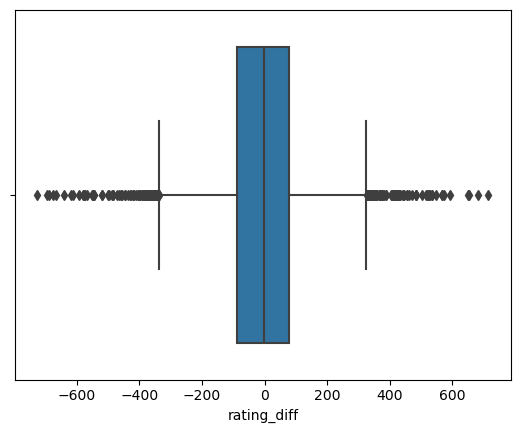

In [32]:
sns.boxplot(data = df, x = 'rating_diff')

<AxesSubplot: xlabel='opening_eco', ylabel='count'>

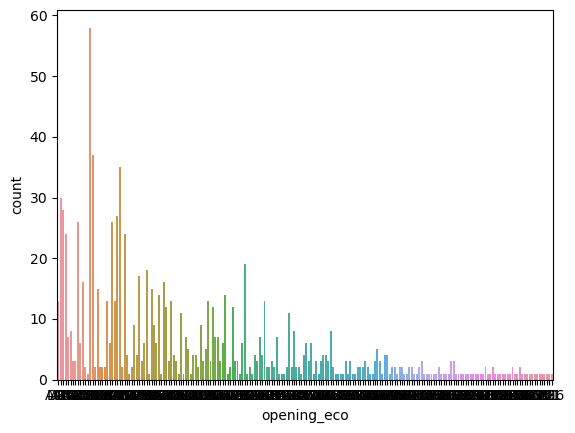

In [36]:
sns.countplot(data = df.loc[(df['winner'] == 'white')], x='opening_eco')

In [42]:
df.loc[df['moves'].duplicated()]

,id,rated,turns,victory_status,winner,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,rating_diff
862,eP09Yv7W,True,4,mate,black,1527,1882,f4 e6 g4 Qh4#,A02,Bird Opening,1,-355
864,V7a3QIoB,True,4,mate,black,1533,1897,f4 e6 g4 Qh4#,A02,Bird Opening,1,-364
867,pSa9EQDs,True,4,mate,black,1552,1887,f4 e6 g4 Qh4#,A02,Bird Opening,1,-335
10327,Iuo32IUI,True,41,mate,white,2247,2094,e4 c5 b4 cxb4 a3 bxa3 Nxa3 Nc6 d4 d5 exd5 Qxd5...,B20,Sicilian Defense: Wing Gambit | Carlsbad Vari...,6,153
11214,hrnqkGeJ,True,54,mate,black,2004,2073,e4 Nf6 Nc3 e5 Nf3 Nc6 d4 exd4 Nxd4 Bb4 Nxc6 bx...,C47,Four Knights Game: Scotch Variation Accepted,8,-69
...,...,...,...,...,...,...,...,...,...,...,...,...
19336,lmk7lokQ,True,98,mate,black,2104,2098,e4 c6 Nc3 d5 d4 dxe4 Nxe4 Bf5 Ng3 Bg6 Nf3 Nd7 ...,B19,Caro-Kann Defense: Classical | Spassky Variation,15,6
19337,34BzwAwa,True,43,mate,white,2029,2117,e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 d6 d4 exd4 Nxd4 Bd7 ...,C48,Four Knights Game: Spanish Variation,7,-88
19339,63PiJLzL,True,70,mate,black,1706,1983,d4 Nf6 Bf4 d5 Nf3 c5 Nbd2 cxd4 Nxd4 Nbd7 Bg3 e...,D02,Queen's Pawn Game: London System,5,-277
19342,2KGzYnb8,True,52,mate,black,1728,1662,e4 c6 d4 d5 e5 Bf5 Bd3 Bxd3 Qxd3 Qb6 c3 Nd7 Ne...,B12,Caro-Kann Defense: Advance Variation,5,66
